# Moire Pattern

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def generate_hexagon(center, a):
    """
    生成以 center 為中心的六邊形頂點座標。
    :param center: 六邊形中心 (x, y)
    :param a: 晶格常數
    :return: 六邊形頂點座標 (6 個點)
    """
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 只取 6 點（不重複）
    hexagon = np.column_stack([center[0] + a * np.cos(angles),
                               center[1] + a * np.sin(angles)])
    return hexagon

def rotate_points(points, angle, center=(0, 0)):
    """
    對一組 2D 點進行旋轉。
    :param points: 點的座標陣列
    :param angle: 旋轉角度（弧度）
    :param center: 旋轉中心
    :return: 旋轉後的點座標
    """
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    # 以 center 為中心旋轉
    return np.dot(points - center, rotation_matrix.T) + center

def generate_graphene_layers(rows, cols, a=2.46, angle=5):
    """
    生成兩層六邊形石墨烯，第二層相對第一層旋轉一定角度。
    :param rows: 六邊形的行數
    :param cols: 六邊形的列數
    :param a: 晶格常數
    :param angle: 第二層旋轉角度（度）
    :return: 第一層與旋轉後的第二層六邊形頂點座標
    """
    hexagons_layer1 = []
    hexagons_layer2 = []

    dx = 1.5 * a  # x 方向間距
    dy = np.sqrt(3) * a  # y 方向間距
    center_of_rotation = np.array([dx * cols / 2, dy * rows / 2])  # 旋轉中心設在格子的中心

    for i in range(rows):
        for j in range(cols):
            x = j * dx
            y = i * dy
            if j % 2 == 1:
                y += dy / 2  # 交錯排列

            # 第一層六邊形
            hexagon = generate_hexagon((x, y), a)
            hexagons_layer1.append(hexagon)

            # 第二層旋轉後的六邊形
            rotated_hexagon = rotate_points(hexagon, angle, center_of_rotation)
            hexagons_layer2.append(rotated_hexagon)

    return hexagons_layer1, hexagons_layer2

def plot_graphene_layers(rows=10, cols=10, angle=5):
    """
    繪製旋轉後的雙層石墨烯六邊形結構（擴展範圍）。
    """
    hexagons_layer1, hexagons_layer2 = generate_graphene_layers(rows, cols, angle=angle)

    plt.figure(figsize=(12, 12))  # 增加圖的大小

    # 第一層六邊形（黑色）
    for hexagon in hexagons_layer1:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=0.8)
        plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=30, zorder=3)

    # 第二層旋轉後的六邊形（紅色）
    for hexagon in hexagons_layer2:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'r', lw=0.8, linestyle='dashed')
        plt.scatter(hexagon[:, 0], hexagon[:, 1], c='r', marker='o', s=30, zorder=3)
    # plt.ylim((0, 175))
    # plt.xlim((0, 175))
    plt.axis('equal')
    plt.title(f'Twisted Bilayer Graphene (Rotation: {angle}°)')
    plt.show()


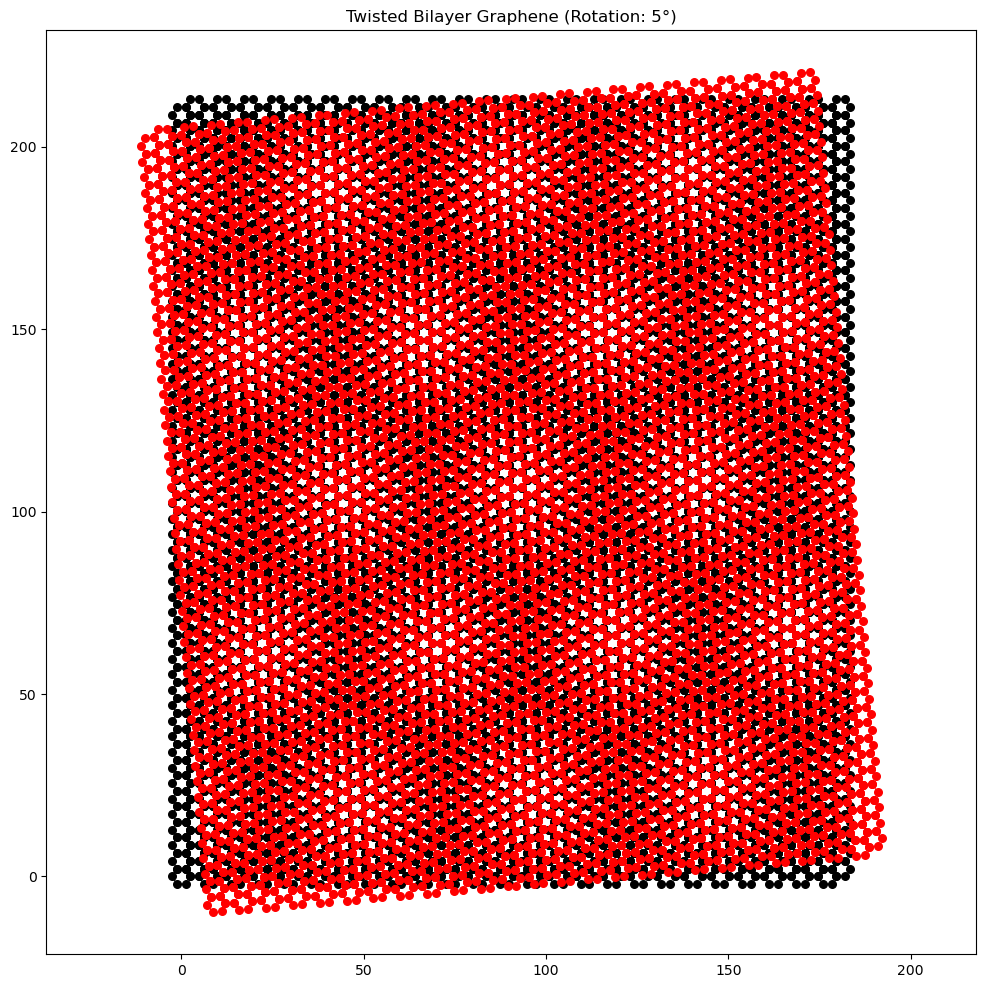

In [3]:

# 繪製更大的雙層石墨烯（10x10 格，旋轉 5°）
plot_graphene_layers(50, 50, angle=5)


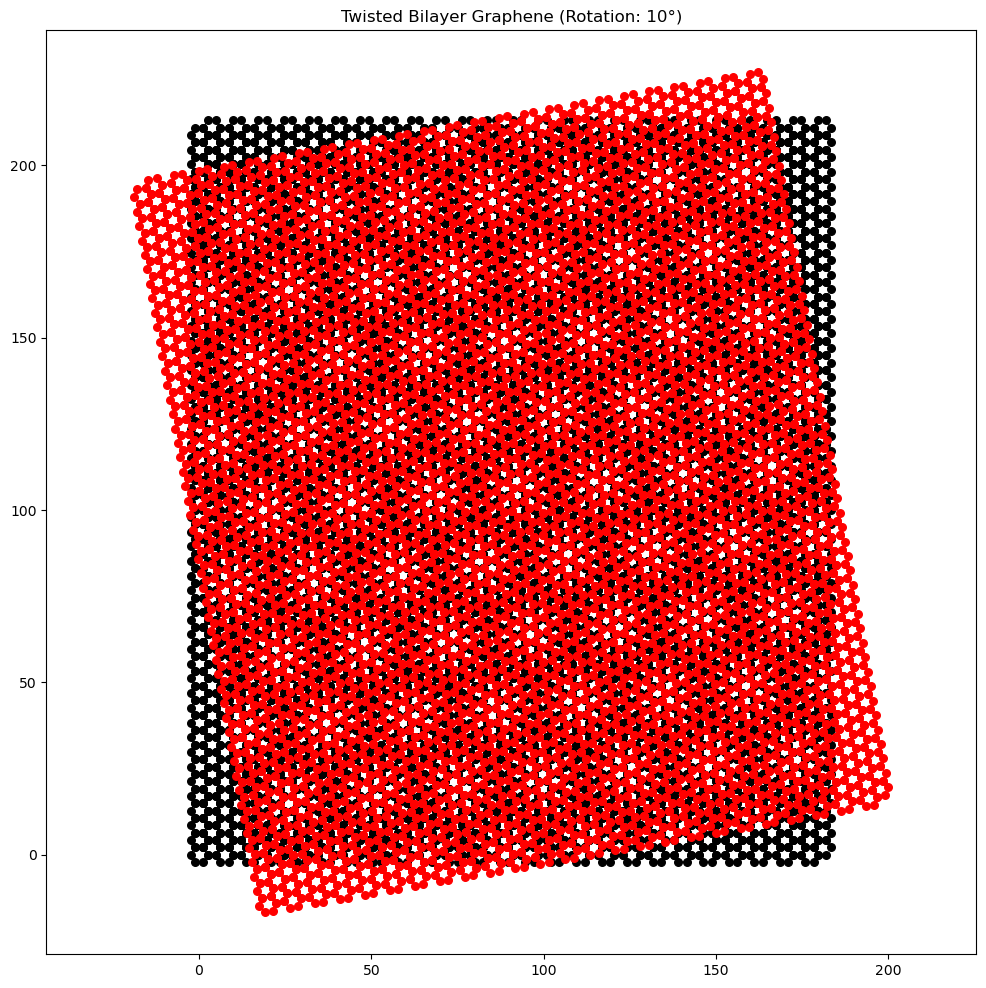

In [4]:
plot_graphene_layers(50, 50, angle=10)

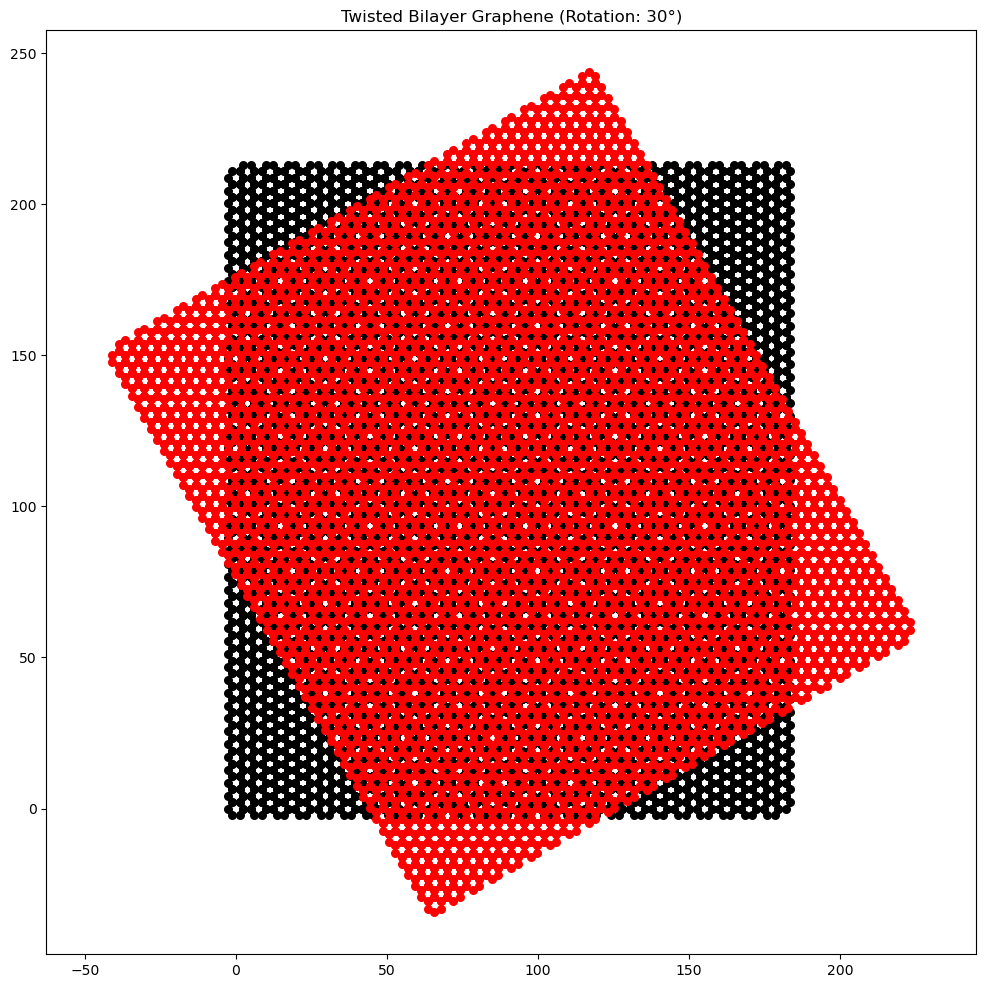

In [5]:
plot_graphene_layers(50, 50, angle=30)

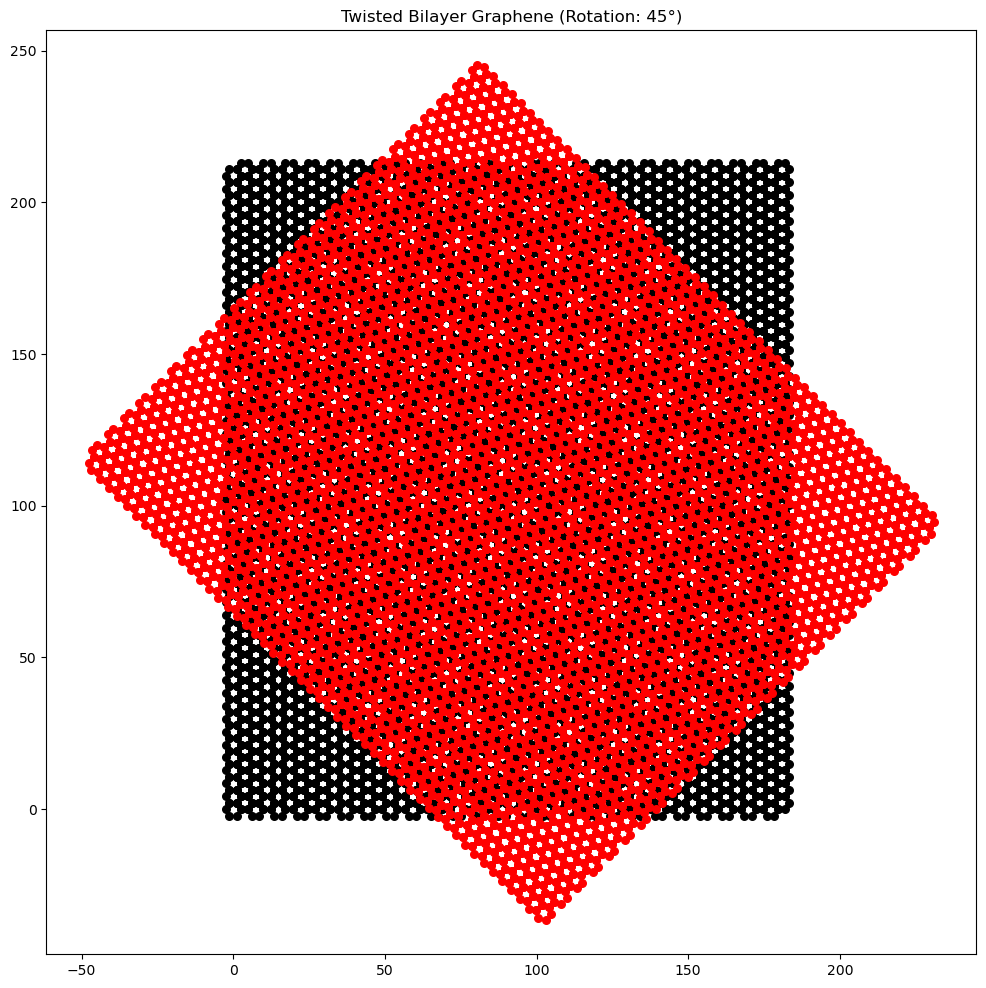

In [6]:
plot_graphene_layers(50, 50, angle=45)